# Исследование объявлений о продаже квартир

## Обзор данных

In [1]:
import matplotlib.pyplot as plt #импорт библиотеки matplotlib
import pandas as pd # импорт библиотеки pandas

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # чтение файла с данными и сохранение в datа

In [2]:
data.head(20) # получение первых 20 строк датафрейма data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() # вывод основной информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

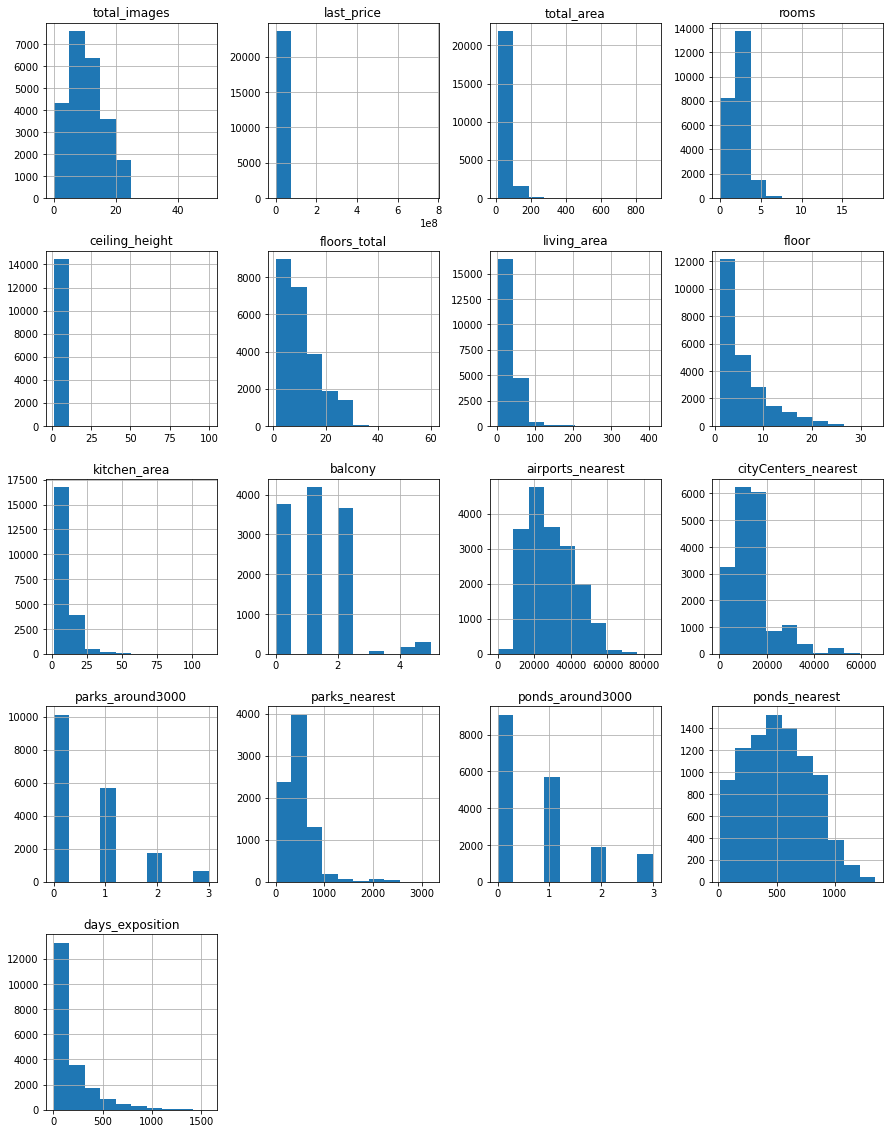

In [4]:
data.hist(figsize=(15, 20))

## Предобработка данных

In [5]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'}) # переименование столбцов

In [6]:
data.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#заполнение пропусков в столбце ceiling_height на среднее значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())

In [10]:
#определение отношения living_area к total_area
living_area_part = data['living_area']/data['total_area']

In [11]:
#заполнение пропусков в столбце living_area с помощью среднего значения коэф. living_area_part 
data['living_area'] = data['living_area'].fillna(data['total_area']*living_area_part.mean())

In [12]:
#определение отношения kitchen_area к total_area
kitchen_area_part = data['kitchen_area']/data['total_area']

In [13]:
#заполнение пропусков в столбце kitchen_area с помощью среднего значения коэф. kitchen_area_part
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*kitchen_area_part.mean())

In [14]:
#проверка на корректность значений всех площадей
data.loc[data['total_area']*0.9 <= (data['living_area']+data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.771499,14.0,59.00,8,False,...,12.000000,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.500000,9.0,38.00,8,NaN,...,10.000000,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.650000,9.0,26.10,5,NaN,...,6.200000,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.500000,25.0,28.00,6,NaN,...,9.000000,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.771499,NaN,20.75,1,NaN,...,5.264668,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.771499,5.0,42.20,2,NaN,...,6.000000,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,2.771499,14.0,40.00,8,NaN,...,10.000000,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.771499,4.0,44.00,2,NaN,...,15.300000,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,2.771499,10.0,18.00,2,NaN,...,4.646398,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0


In [15]:
#сохраняем data без аномалий, не соответствующих условию
data = data.loc[data['total_area']*0.9 > (data['living_area']+data['kitchen_area'])]

In [17]:
#заполнение пропусков в столбце balcony
data['balcony'] = data['balcony'].fillna(0)

In [18]:
#поиск уникальных значений столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
#обработка неявных дубликатов (приведение населенных пунктов к единой категории)
data['locality_name'] = (data['locality_name'].str.replace('ё', 'е')
                                             .str.replace('деревня', 'поселок')
                                             .str.replace('садовое товарищество', 'поселок')
                                             .str.replace('поселок городского типа', 'поселок')
                                             .str.replace('городской поселок', 'поселок')
                                             .str.replace('коттеджный поселок', 'поселок')
                                             .str.replace('поселок станции', 'поселок')
                                             .str.replace('поселок при железнодорожной станции', 'поселок')
                        )

In [20]:
#обработка неявных дубликатов
data['locality_name'] = (data['locality_name'].replace('поселок Мурино', 'Мурино', regex=True)
                                              .replace('поселок Кудрово', 'Кудрово', regex=True)
                                              .replace('село Павлово', 'поселок Павлово', regex=True)
                                              .replace('поселок Никольское', 'Никольское', regex=True)
                                              .replace('поселок Любань', 'Любань', regex=True)
                        )
len(data['locality_name'].unique())

304

In [22]:
#заполение пропусков в столбце airports_nearest при помощи медианного значения для каждого населенного пункта
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].mean()

In [23]:
#заполение пропусков в столбце city_centers_nearest при помощи медианного значения для каждого населенного пункта
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == t), 'city_centers_nearest'].mean()

In [24]:
#заполение пропусков в столбце parks_around_3000 при помощи медианного значения для каждого населенного пункта
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_around_3000'].isna()), 'parks_around_3000'] = \
    data.loc[(data['locality_name'] == t), 'parks_around_3000'].mean()

In [25]:
#заполение пропусков в столбце parks_nearest при помощи медианного значения для каждого населенного пункта
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == t), 'parks_nearest'].mean()

In [26]:
#заполение пропусков в столбце ponds_around_3000 при помощи медианного значения для каждого населенного пункта
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_around_3000'].isna()), 'ponds_around_3000'] = \
    data.loc[(data['locality_name'] == t), 'ponds_around_3000'].mean()

In [27]:
#заполение пропусков в столбце ponds_nearest при помощи медианного значения для каждого населенного пункта
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == t), 'ponds_nearest'].mean()

In [28]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               83
living_area                 0
floor                       0
is_apartment            20325
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         4675
city_centers_nearest     4675
parks_around_3000        4675
parks_nearest            5825
ponds_around_3000        4675
ponds_nearest            4800
days_exposition          3082
dtype: int64

Для того, чтобы убрать пропуски в данных, был использован цикл, выбирающий каждый населенный пункт с пропуском в столбцах airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest и присвающий среднее значение, касающийся этого населенного пункта.
Часть пропусков была заполнена, но часть осталась, так как в некоторых населенных пунктах нет расстояния во всех строках, поэтому вычислить среднее не представляется возможным.
Пропуски в данных можно объяснить техническим фактором. Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных или геосервис, с помощью которого были получены данные, не смог определить местоположение населенного пункта. 

In [30]:
#удаление строк, имеющих пропуски в столбцах floors_total и locality_name
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])

In [31]:
#изменение типа данных на целочисленный
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

В столбцах airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest есть пропуски, поэтому преобразовать их в целочисленный тип данных нельзя. Изменение в столбцах floors_total, balcony, days_exposition связано с тем, что данные в этих столбцах могут принимать только целые значения.

Вывод: в результате предобработки данных были удалены неявные дубликаты в столбце locality_name, а также были заполнены пропуски, где это было возможно и удалены строки, в которых не было возможности заполнить значения

### Добавление в таблицу новых столбцов

In [32]:
#определение цены квадратного метра
data['price_m2'] = round(data['last_price']/data['total_area'], 2)

In [33]:
#изменение типа данных даты и создание столбца с днем недели публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [34]:
#создание столбца с месяцем публикации
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [35]:
#создание столбца с годом публикации
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [36]:
#проверка уникальных значений столбца floor
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [37]:
# создание функции по определению типа этажа
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

In [38]:
#добавление столбца с типом этажа
data['floor_type'] = data.apply(floor_type, axis=1)

In [39]:
#перевод из м в км столбец city_centers_nearest
data['city_centers_nearest'] = round(data['city_centers_nearest']/1000)

## Исследовательский анализ данных

<AxesSubplot:>

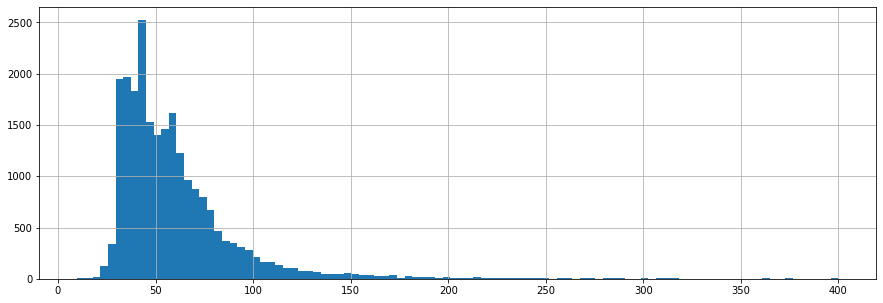

In [40]:
#построение гистаграммы по столбцу total_area
data['total_area'].hist(bins=100, range = (10, 400), figsize=(15, 5))

По гистограмме total_area можно сказать, что большее количество объявлений находится в диапазоне от 25 до 100 кв. м

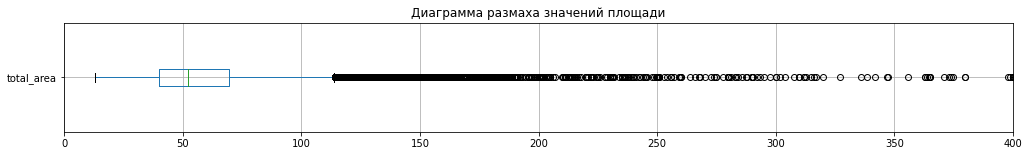

In [41]:
#построение диаграммы размаха по столбцу total_area
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

In [43]:
#срез по столбцу total_area
data = data.query('total_area > 20 & total_area < 300')

<AxesSubplot:>

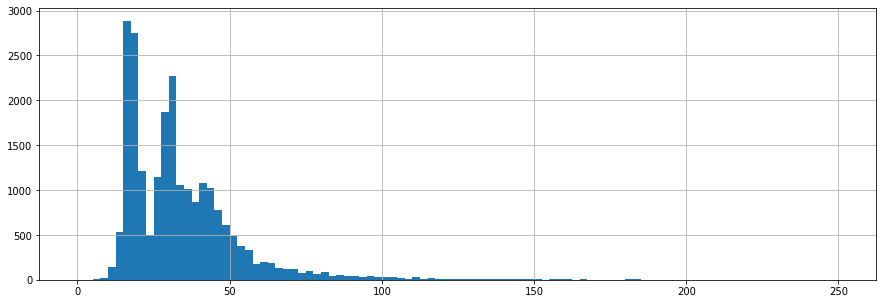

In [44]:
#построение гистаграммы по столбцу living_area
data['living_area'].hist(bins=100, range = (0, 250), figsize=(15, 5))

По гистограмме living_area можно сказать, что большее количество объявлений находится в диапазоне от 15 до 60 кв. м

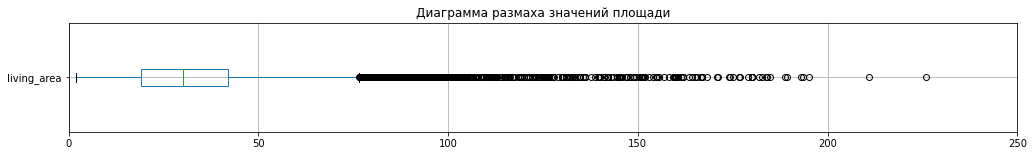

In [45]:
#построение диаграммы размаха по столбцу living_area
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 250);

In [46]:
#срез по столбцу living_area
data = data.query('living_area > 5 & living_area < 150')

<AxesSubplot:>

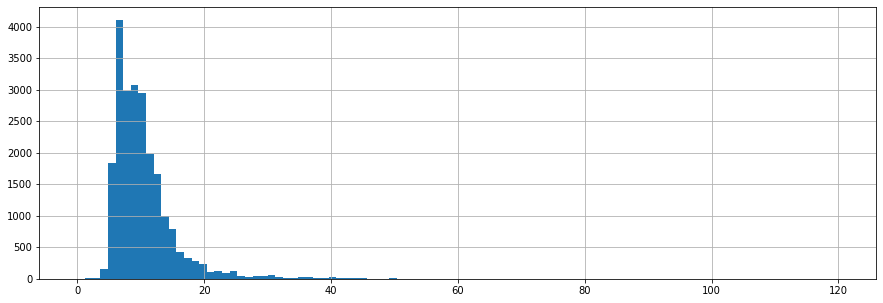

In [47]:
#построение гистаграммы по столбцу kitchen_area
data['kitchen_area'].hist(bins=100, range = (0, 120), figsize=(15, 5))

По гистограмме kitchen_area можно сказать, что большее количество объявлений находится в диапазоне от 5 до 20 кв. м

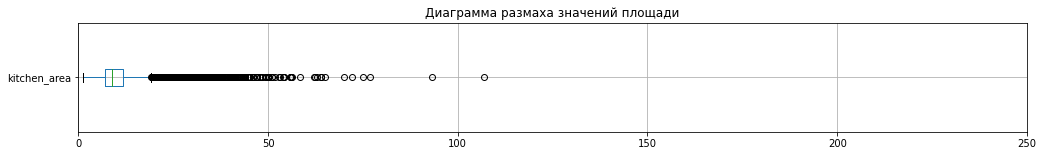

In [48]:
#построение диаграммы размаха по столбцу kitchen_area
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 250);

<AxesSubplot:>

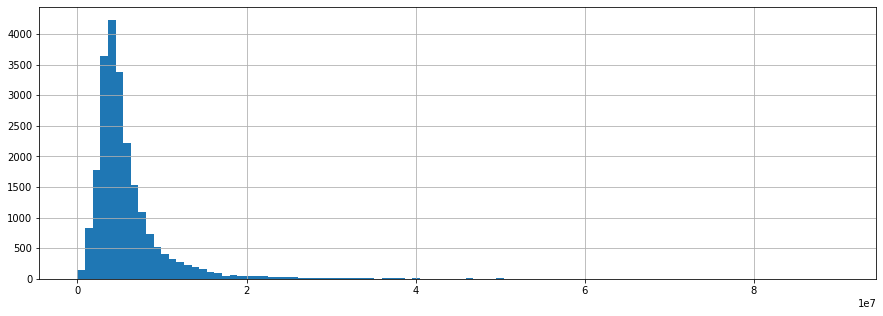

In [51]:
#построение гистаграммы по столбцу last_price
data['last_price'].hist(bins=100, range = (0, 90000000), figsize=(15, 5))

По гистограмме last_price можно сказать, что большее количество объявлений находится в диапазоне от 0 до 2 * 10 ** 7 рублей

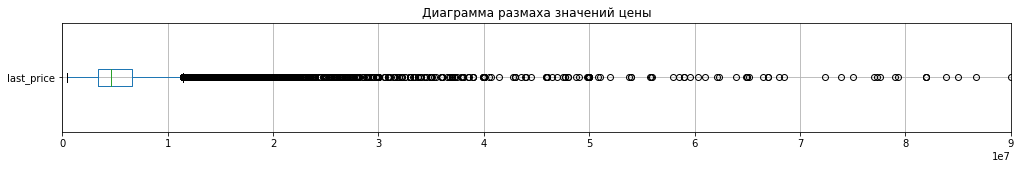

In [52]:
#построение диаграммы размаха по столбцу last_price
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений цены')
ax.set_xlim(0, 90000000);

In [53]:
#срез по столбцу last_price
data = data.query('last_price < 40000000')

<AxesSubplot:>

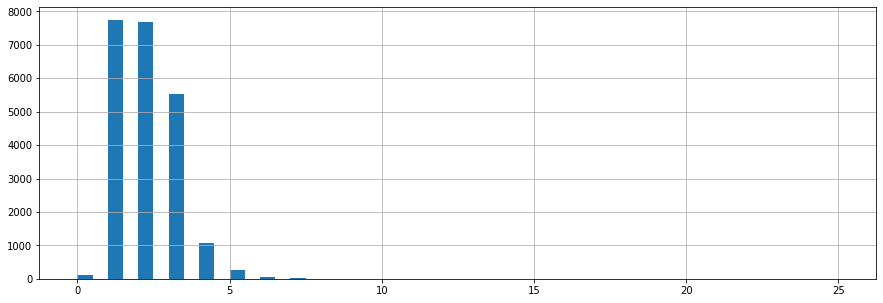

In [54]:
#построение гистаграммы по столбцу rooms
data['rooms'].hist(bins=50, range = (0, 25), figsize=(15, 5))

По гистограмме rooms можно сказать, что наибольшее кол-во комнат находится в диапазоне от 1 комнаты до 5

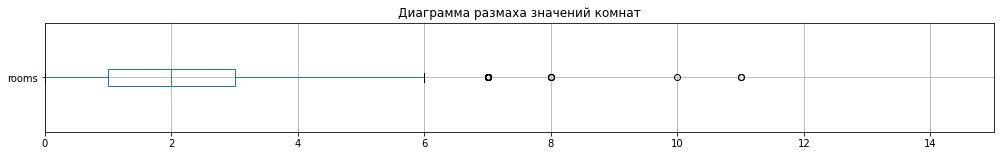

In [55]:
#построение диаграммы размаха по столбцу rooms
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений комнат')
ax.set_xlim(0, 15);

In [56]:
#срез по столбцу rooms
data = data.query('rooms < 6')

<AxesSubplot:>

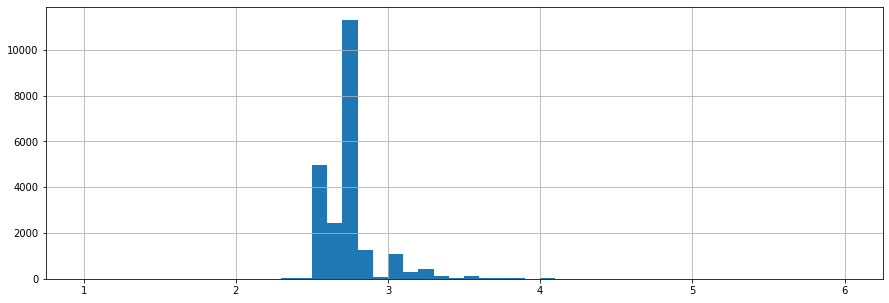

In [57]:
#построение гистаграммы по столбцу ceiling_height
data['ceiling_height'].hist(bins=50, range = (1, 6), figsize=(15, 5))

In [58]:
#срез по столбцу ceiling_height
data = data.query('ceiling_height > 2.2')

По гистограмме rooms можно сказать, что наибольшее количество значений высоты потолков находится в диапазоне от 2,5 комнаты до 3,1 м.

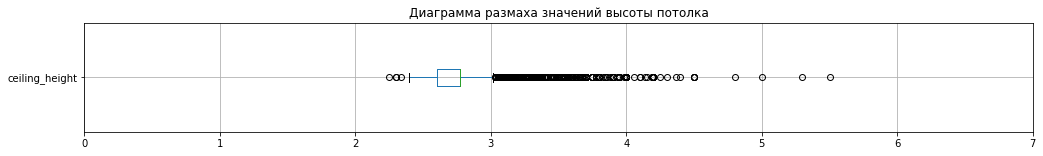

In [59]:
#построение диаграммы размаха по столбцу ceiling_height
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений высоты потолка')
ax.set_xlim(0, 7);

In [60]:
#просмотр уникальных значений столбца ceiling_height
data['ceiling_height'].unique()

array([ 2.7      ,  2.7714989,  2.5      ,  2.67     ,  2.56     ,
        3.05     ,  2.75     ,  2.6      ,  2.9      ,  2.8      ,
        2.55     ,  3.       ,  2.65     ,  2.61     ,  3.2      ,
        3.25     ,  3.45     ,  2.77     ,  2.85     ,  2.64     ,
        2.57     ,  4.15     ,  3.3      ,  2.71     ,  4.       ,
        2.47     ,  2.73     ,  2.84     ,  3.1      ,  2.34     ,
        3.4      ,  3.5      ,  3.06     ,  2.72     ,  2.54     ,
        2.51     ,  2.78     ,  2.76     , 25.       ,  2.58     ,
        2.52     ,  2.87     ,  2.66     ,  2.59     ,  2.45     ,
        3.6      ,  2.92     ,  3.11     ,  3.13     ,  3.8      ,
        3.15     ,  3.55     ,  3.62     ,  3.12     ,  2.53     ,
        2.74     ,  2.96     ,  5.       ,  2.79     ,  2.95     ,
        4.06     ,  2.94     ,  3.7      ,  3.54     ,  3.53     ,
        2.83     ,  2.4      ,  3.38     ,  3.01     ,  3.65     ,
        3.18     ,  3.35     ,  2.3      ,  3.57     ,  2.48  

In [61]:
#приведение ошибочных значений в столбце ceiling_height к правильному виду
data['ceiling_height'] = data['ceiling_height'].replace('25', '2.5', regex=True)
data['ceiling_height'] = data['ceiling_height'].replace('27.5', '2.75', regex=True)
data['ceiling_height'] = data['ceiling_height'].replace('32', '3.2', regex=True)
data['ceiling_height'] = data['ceiling_height'].replace('20', '2.0', regex=True)
data['ceiling_height'] = data['ceiling_height'].replace('27', '2.7', regex=True)
data['ceiling_height'] = data['ceiling_height'].replace('26', '2.6', regex=True)
data['ceiling_height'] = data['ceiling_height'].replace('22.6', '2.26', regex=True)

In [62]:
#срез по высоте потолков, так как средняя высота равна 3,2 м, было выбрано значение, которое немного превышает его
data = data.query('ceiling_height < 4')

<AxesSubplot:>

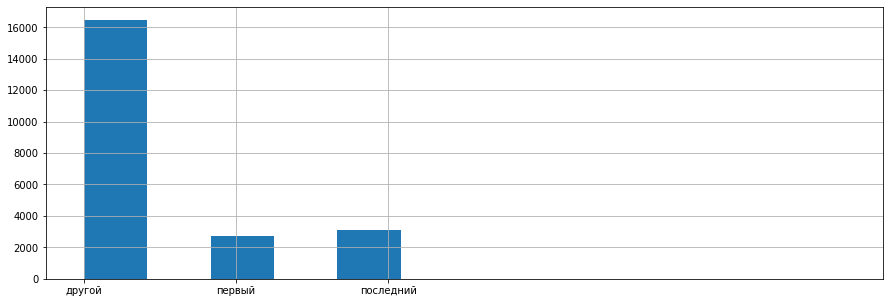

In [63]:
#построение гистаграммы по столбцу floor_type
data['floor_type'].hist(bins=12, range = (0, 5), figsize=(15, 5))

По гистограмме floor_type сказать, что наибольшее количество значений типов этажей приходится на другие.

<AxesSubplot:>

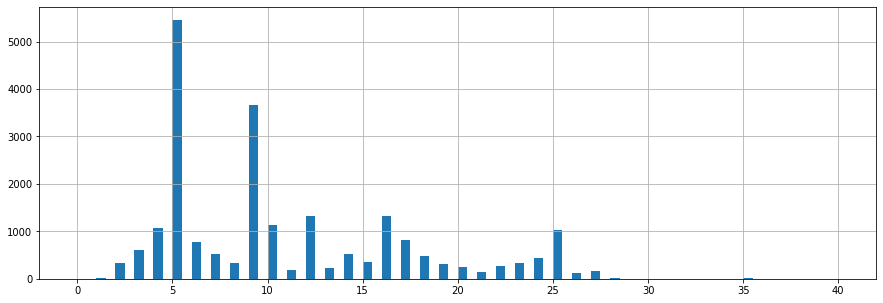

In [64]:
data['floors_total'].hist(bins=80, range = (0, 40), figsize=(15, 5))

По гистограмме floor_type сказать, что наибольшее количество последних этажей приходится на 5 этажные и 9 этажные здания.

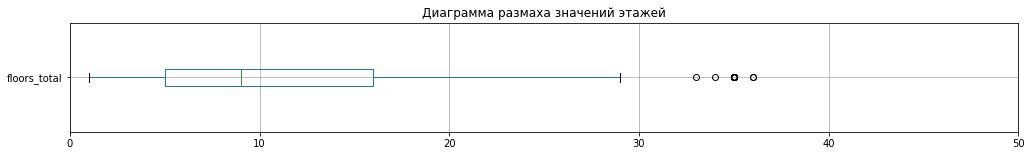

In [65]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений этажей')
ax.set_xlim(0, 50);

In [66]:
#срез по столбцу floors_total
data = data.query('floors_total < 30')

<AxesSubplot:>

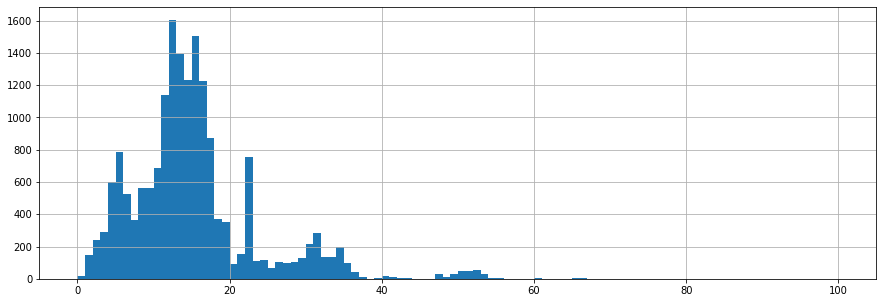

In [67]:
data['city_centers_nearest'].hist(bins=100, range = (0, 100), figsize=(15, 5))

По гистограмме city_centers_nearest можно сказать, что наибольшее количество значений расстояния до центра города находится до 40 км от центра Санкт-Петербурга.

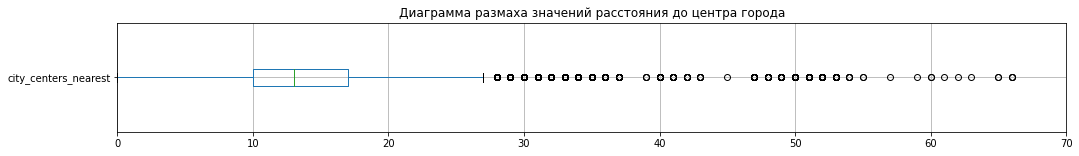

In [68]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['city_centers_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений расстояния до центра города')
ax.set_xlim(0, 70);

In [70]:
#срез по столбцу city_centers_nearest
data = data.loc[((data['city_centers_nearest'] < 60) | (data['city_centers_nearest'].isnull()))]

<AxesSubplot:>

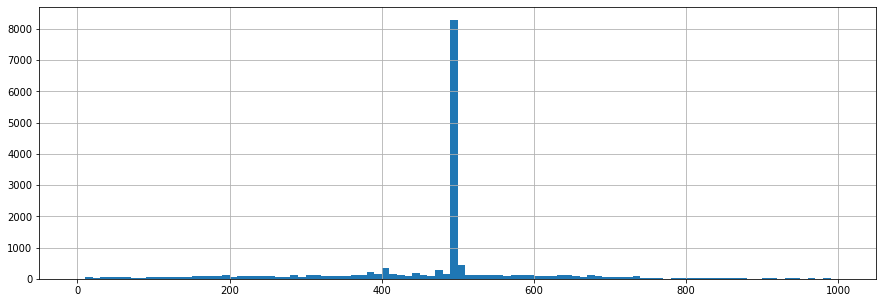

In [72]:
data['parks_nearest'].hist(bins=100, range = (0, 1000), figsize=(15, 5))

По гистограмма parks_nearest не отображает действительной картины, так как в данных было много пропусков, которые в дальнейшем были заполнены медианным значением.

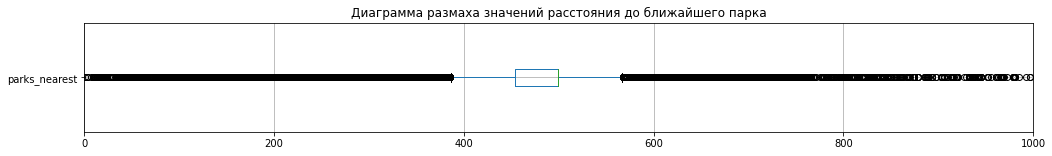

In [73]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['parks_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений расстояния до ближайшего парка')
ax.set_xlim(0, 1000);

Исходя из построеных гистограмм и диаграмм размаха были выполнены срезу по некоторым столбцам, чтобы исключить аномальные значения. Несмотря на то, что в некоторых столбцах (last_price, rooms) присутствует большое количество значений, выходящих за межквартильный размах, эти значения нельзя исключить, потому что для этого нет рационального обоснования (стоимость и количество комнат могут быть любыми) 

<AxesSubplot:>

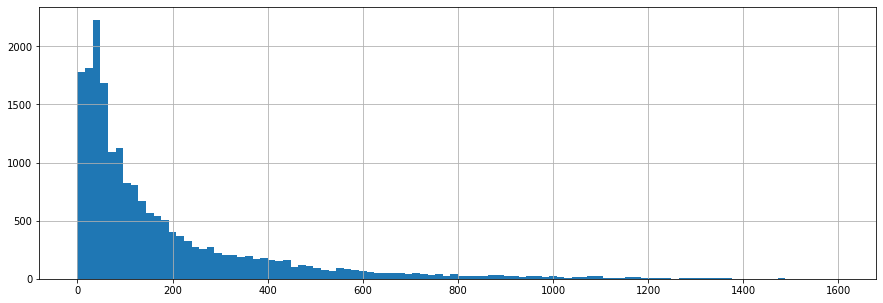

In [76]:
data['days_exposition'].hist(bins=100, range = (0, 1600), figsize=(15, 5))

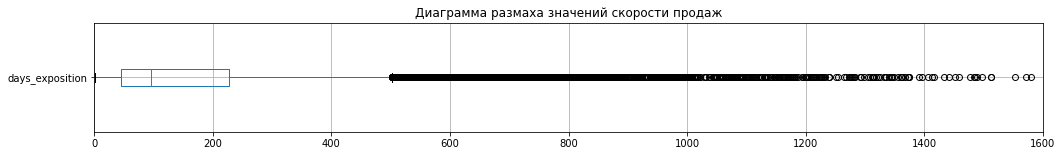

In [77]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений скорости продаж')
ax.set_xlim(0, 1600);

In [78]:
data = data.loc[(((data['days_exposition'] > 2) & (data['days_exposition'] < 1400)) | (data['days_exposition'].isnull()))]

<AxesSubplot:>

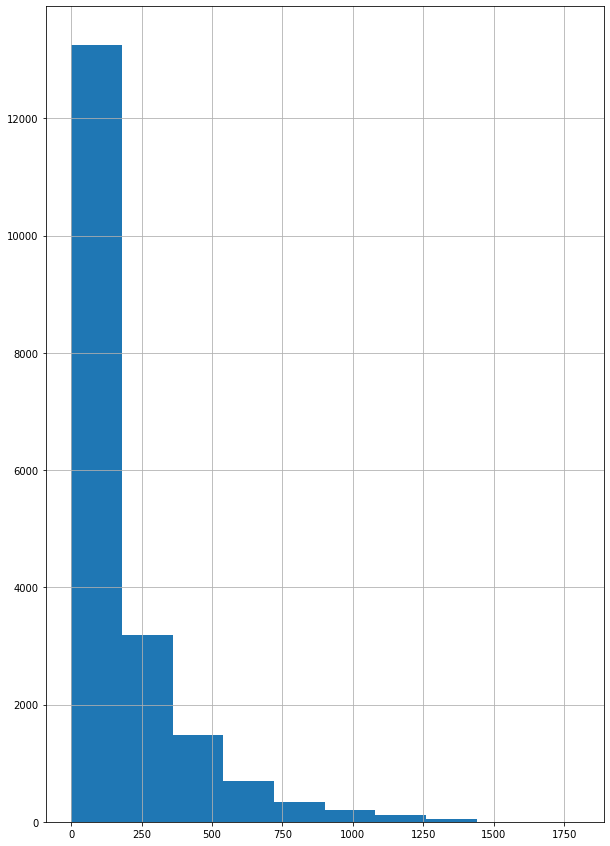

In [87]:
#построение гистаграммы по столбцу days_exposition
data['days_exposition'].hist(range = (0, 1800), figsize=(10, 15))

In [88]:
#определение медианы, среднего значения
data['days_exposition'].describe()

count    19309.000000
mean       178.047284
std        214.589519
min          3.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1396.000000
Name: days_exposition, dtype: float64

Можно утверждать, что в среднем продажа объекта занимает 187 дней. Быстрыми можно назвать продажи, длящиеся менее 51 дня, необычайно долгими - более 211 дней.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

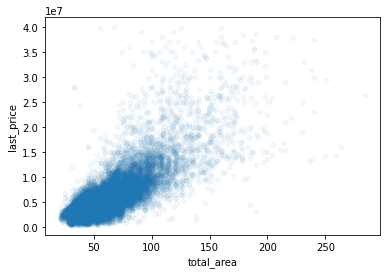

In [90]:
#построение графика зависимости "total_area-last_price"
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter', alpha=0.05) 

In [91]:
#определение коэф. корреляции
data['total_area'].corr(data['last_price'])

0.7727376151121598

Определив коэф. корреляции, можно сказать, что с увеличением общей площади, цена также увеличивается

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

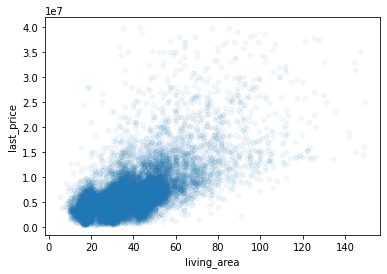

In [92]:
#построение графика зависимости "living_area-last_price"
data.sort_values('living_area').plot(x='living_area', y='last_price', kind='scatter', alpha=0.05) 

In [93]:
data['living_area'].corr(data['last_price'])

0.6739254762154301

Жилая площадь и цена растут прямо пропорционально, но коэф. корреляции ниже по сравнению с коэф. корреляции total_area-last_price

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

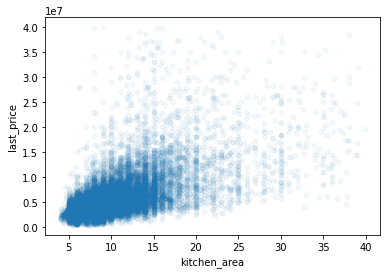

In [94]:
#построение графика зависимости "kitchen_area-last_price"
data.sort_values('kitchen_area').plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.05)

In [95]:
data['kitchen_area'].corr(data['last_price'])

0.5998736875356956

Коэф. корреляции kitchen_area-last_price ниже, чем другие коэф, но больше 0, что говорит о росте прямом росте kitchen_area-last_price.

<AxesSubplot:xlabel='rooms'>

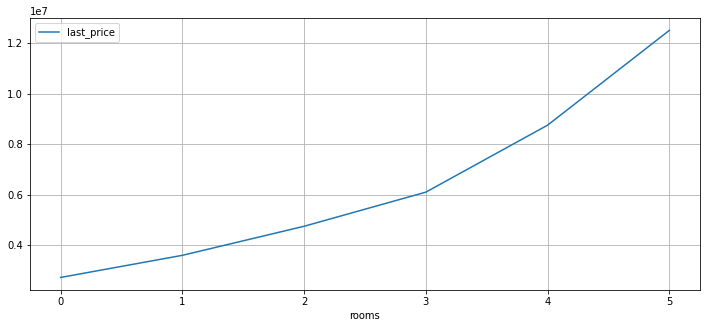

In [96]:
#определение медианы столбца rooms
#построение графика зависимости "rooms-last_price"
data.pivot_table(index=['rooms'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='floor_type'>

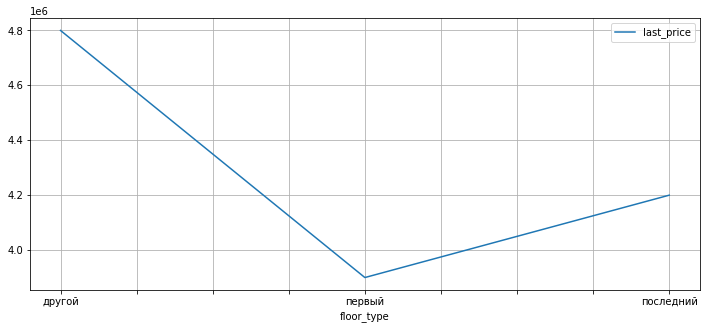

In [97]:
#определение медианы столбца floor_type
#построение графика зависимости "floor_type-last_price"
data.pivot_table(index=['floor_type'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='weekday'>

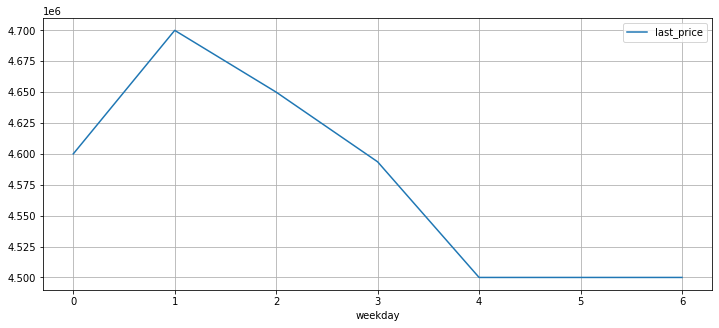

In [98]:
#определение медианы столбцов weekday
#построение графика зависимости "weekday-last_price"
data.pivot_table(index=['weekday'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='month'>

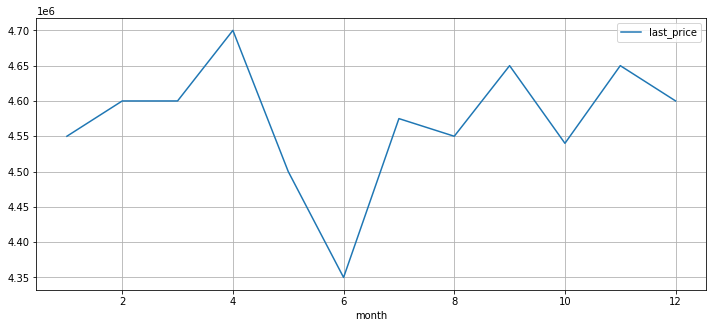

In [99]:
#определение медианы столбцов month
#построение графика зависимости "month-last_price"
data.pivot_table(index=['month'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='year'>

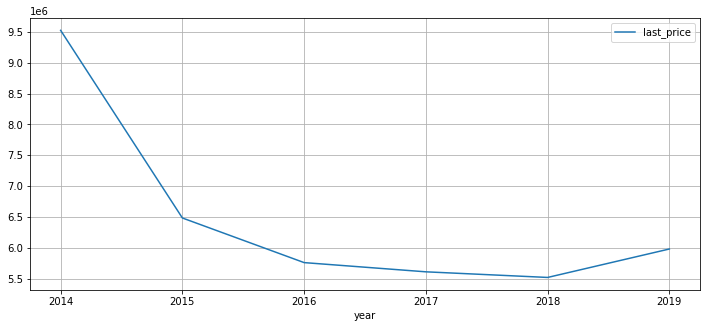

In [100]:
#определение медианы столбцов year
#построение графика зависимости "year-last_price"
data.pivot_table(index=['year'], values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='year'>

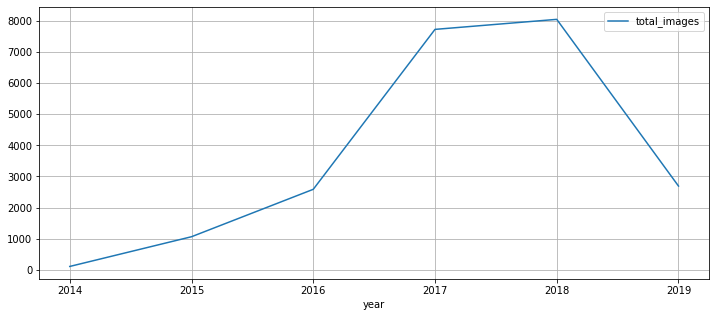

In [101]:
#определение медианы столбцов year
#построение графика зависимости "year-total_area"
data.pivot_table(index=['year'], values='total_images', aggfunc='count').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='year'>

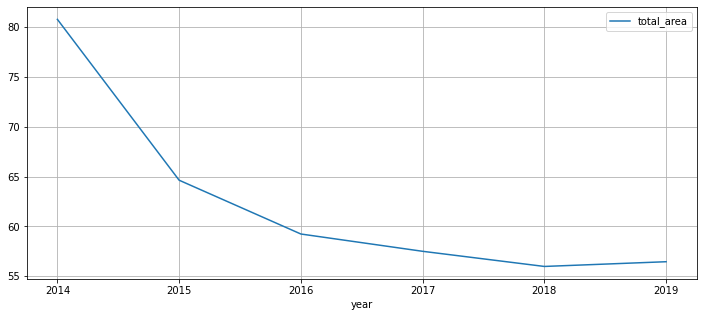

In [102]:
#определение медианы столбцов year
#построение графика зависимости "year-total_area"
data.pivot_table(index=['year'], values='total_area', aggfunc='mean').plot(grid=True, figsize=(12, 5))

С ростом общей площади цена на объект увеличивается. Пики значений, связанные с площадью возможно связаны с тем, что объект находится в Санкт-Петербурге. По графикам также можно сказать, что наибольшую цену имеют объекты, имеющие 12 комнат; объекты, находящиеся на 1 этаже имеют наименьшую стоимость по сравнению с другими типами.
По графику "weekday-last_price" можно сделать вывод, что цена не изменяется в первую половину недели (понедельник, вторник, среда), а затем начинает снижаться (пятница, суббота, воскресенье).
По графику "month-last_price" можно сказать, что цена в объявлении не зависит от месяца.
График "year-last_price" показывает, что стоимость объекта в объявлении снижалась с 2014 по 2017 гг, а затем стала возрастать. Это может быть связано с тем, что кол-во объявлений с 2014 по 2017 гг увеличивалось, а с 2018 снизилось, поэтому цена увеличилась. Также это может быть связано с тем, что с 2014 г. общая площадь помещения снижалась, что также снижало цену.  


In [103]:
#создание сводной таблицы с кол-вом объявлений и стоимости метра в зависимости от населенного пункта
pivot_locality_name = data.pivot_table(index=['locality_name'], values='price_m2', aggfunc=['count','mean'])
#изменение названия столбцов
pivot_locality_name.columns = ['count', 'price_m2_mean']
#сортировка значений по столбцу count (кол-во объявлений)
pivot_locality_name = pivot_locality_name.sort_values(by='count', ascending=False)
pivot_locality_name = pivot_locality_name.query('count >= 222')
pivot_locality_name = pivot_locality_name.sort_values(by='price_m2_mean', ascending=False)
pivot_locality_name

,count,price_m2_mean
locality_name,,
Санкт-Петербург,14633,110751.526842
Пушкин,349,102449.828711
Кудрово,447,94923.135660
поселок Парголово,322,90133.576491
Мурино,540,85387.635315
поселок Шушары,431,78304.220510
Колпино,333,75380.806967
Гатчина,298,68760.427953
Всеволожск,378,68500.230503


По данной сводной таблице можно сказать, что наибольшая стоимость квадратного метра у объектов в Санкт-Петербурге, наименьшая - в Выборге.

<AxesSubplot:xlabel='locality_name'>

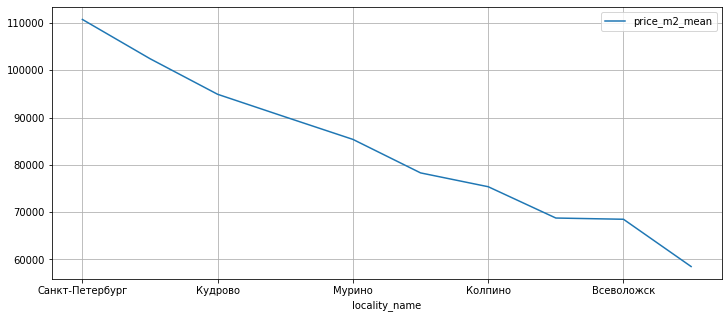

In [104]:
pivot_locality_name.plot(y='price_m2_mean', figsize=(12, 5), grid=True)

In [105]:
#выбор объявлений только в Санкт-Петербурге
cost_km_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']

In [106]:
spb_km_mean = cost_km_spb.groupby('city_centers_nearest')['last_price'].mean()

<AxesSubplot:xlabel='city_centers_nearest'>

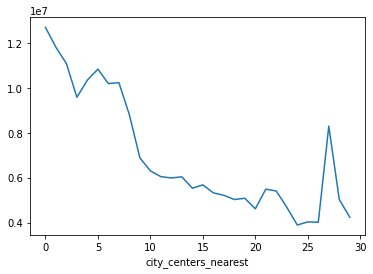

In [107]:
#построение графика зависимости "city_centers_nearest-cost_km"
spb_km_mean.plot(x='city_centers_nearest', y='spb_km_mean')

По данным графика можно сказать, что стоимость одного километра падает по мере удаления от центра города за исключением пика на 27 км.

In [108]:
#вывод всех объвлений, находящихся на удалении 27 км от центра Санкт-Петербурга
cost_km_spb.loc[cost_km_spb['city_centers_nearest'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_type
748,13,14350000.0,74.0,2017-11-28,2,3.130000,5,30.0,3,NaN,...,1.0,1496.000000,0.0,521.266175,128.0,193918.92,1,11,2017,другой
5961,6,2250000.0,32.0,2018-02-27,1,2.771499,2,16.5,2,NaN,...,0.0,499.388244,0.0,521.266175,178.0,70312.50,1,2,2018,последний


На 27 км от центра размещены всего два объявления. Пик связан с размещением объявления со стоимостью квартиры 14,35 млн. Доля этого объявления от всех объявлений на 27 км составляет 50%, а в связи с высокой стоимостью это создало пик на графике. 

In [109]:
km_3_spb = cost_km_spb.query('city_centers_nearest == 3')

In [110]:
part_floor_3km = (km_3_spb.groupby('floor_type')['last_price'].count())/(km_3_spb['last_price'].count())
part_floor_3km

floor_type
другой       0.587031
первый       0.167235
последний    0.245734
Name: last_price, dtype: float64

In [111]:
km_5_spb = cost_km_spb.query('city_centers_nearest == 5')

In [112]:
part_floor_5km = (km_5_spb.groupby('floor_type')['last_price'].count())/(km_5_spb['last_price'].count())
part_floor_5km

floor_type
другой       0.767176
первый       0.086514
последний    0.146310
Name: last_price, dtype: float64

Провал в графике на 3 км связан с тем, что доля квартир, расположенных на 1 этаже составляет около 17%, а стоимость квартир на 1 этаже намного меньше, исходя из графика, полученного выше.
Пик в графике на 5 км можно объяснить тем, что доля квартир с типом этажа "другой" составляет около 77%, а стоимость квартир с данным типом этажа является наибольшей из графика, полученного ранее.

## Общий вывод

На этапе предобработки в данных были выявлены пропуски. Часть из них была устранена, но стоит отметить, что получение на основе картографических данных нуждается в улучшении, так как большая часть пропусков связана именно с этим.
Столбец is_apartment рекомендуется убрать, в связи с тем, что в нем имеется наибольшое число пропусков, устранить которые нельзя и он не оказывается влияния на стоимость объекта. Также в результате обработки данных были удалены неявные дубли.
Затем таблица была дополнена новыми столбцами с данными стоимости квадратоного метра, типа этажа, дня недели, месяца и года.
По результатам исследовательского анализа можно утверждать, что наибольшое число объектов в объявлениях имеют общую площадь менее 100 кв.м, жилую - менее 50 кв.м, кухни - менее 20 кв.м, стоимость - менее 10 млн, комнат - 4 и менее, располагаются не на 1 и не на последнем этажах.
Также стоит отметить, что более половины от всех объявлений расположены в Санкт-Петербурге, цена на часть из которых намного больше средней.
Далее были построены графики зависимости цены объекта от различных параметров.
В результате построения графиков можно сделать вывод о том, что стоимость квартиры по большей части зависит от общей площади помещения. Также можно утверждать, что со временем общая площадь квартир стала снижаться. В 2018-2019 года стоимость квартир начала снова возрастать, но площадь практически не менялась. Повышение стоимости квартир в 2018-2019 годах можно связать с соркращением числа объявлений.